In [54]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

In [61]:
dados = pd.read_csv('https://raw.githubusercontent.com/ChernoBen/IAatividadeII/main/new_dataset',
                 sep= ';')
df = dados[['NU_IDADE_N','FATOR_RISC','EVOLUCAO']]
df.head()

,NU_IDADE_N,FATOR_RISC,EVOLUCAO
0,47,N,1.0
1,42,S,1.0
2,49,N,1.0
3,36,N,0.0
4,2,N,0.0


In [62]:
#remoção de casos com valores diferentes de obito e cura
df  = df.drop(df[df['EVOLUCAO'] > 2 ].index)
df  = df.drop(df[df['EVOLUCAO'] < 1  ].index)
def rotula(dataset,param):
    arr =[]
    param = param
    dt = dataset
    for item in dt:
        if item == param:
            arr.append(1)
        else:
            arr.append(0)
    return arr
df

,NU_IDADE_N,FATOR_RISC,EVOLUCAO
0,47,N,1.0
1,42,S,1.0
2,49,N,1.0
5,80,N,1.0
6,37,S,2.0
...,...,...,...
945445,73,S,1.0
945446,75,S,2.0
945448,59,S,1.0
945449,73,N,2.0


In [67]:
#rotulando lados 1 == cura
df['FATOR_RISC'] = rotula(df['FATOR_RISC'],'S')
df['EVOLUCAO'] = rotula(df['EVOLUCAO'],1)
X = df[['NU_IDADE_N','FATOR_RISC']].values
y = df['EVOLUCAO'].values
y = df.EVOLUCAO.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

X_test

array([[ 5,  0],
       [51,  0],
       [65,  0],
       ...,
       [24,  0],
       [59,  0],
       [ 6,  0]], dtype=int64)

In [69]:
# instancia o classificador com nome logit
logit = LogisticRegression()

In [66]:
# treina o modelo
logit.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

array([[0.95381386, 0.92984277, 0.18617892]])

array([[0.95381386],
       [0.92984277],
       [0.18617892]])

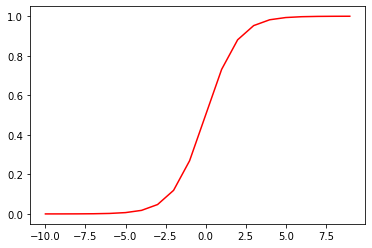

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 12)

NameError: name 'custo' is not defined

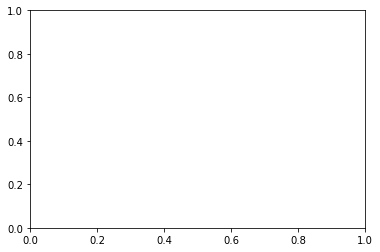